In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

import sys
sys.path.append('/mnt/disk1/yunseob/Pytorch/SSM/0_modules')
from SSM_utils import GBdataLoad, B6dataLoad
from SSM_DL_evl import SSM_Model

from sklearn.metrics import roc_curve, auc

In [2]:
model_dir = './model/'
CM_save_dir = './results/1_confusion_mat/'

In [3]:
data_dir = '/mnt/disk1/yunseob/Pytorch/SSM/1_Semblex/05_10p_overlap/SemblexData/wt_4040'

GB_test_X, GB_test_Y = GBdataLoad(data_dir, ch = [0, 1], data_type = '4_test_data')
B6_test_X, B6_test_Y = B6dataLoad(data_dir, ch = [0, 1], data_type = '4_test_data')

In [4]:
GB_train_X, GB_train_Y = GBdataLoad(data_dir, ch = [0, 1], data_type = '3_train_data')
B6_train_X, B6_train_Y = B6dataLoad(data_dir, ch = [0, 1], data_type = '3_train_data')

GB_train_X, GB_train_Y = np.concatenate(GB_train_X), np.concatenate(GB_train_Y)
B6_train_X, B6_train_Y = np.concatenate(B6_train_X), np.concatenate(B6_train_Y)

# 1. Fault diagnosis

In [5]:
class_name = ['Good', 'Bad']

Model: GB_00p_AB_2004250656_03170_accr_1.0000_loss_0.000021_val_accr_1.0000_val_loss_0.000548.pt 

Accuracy: 99.71 % (1394 / 1398)



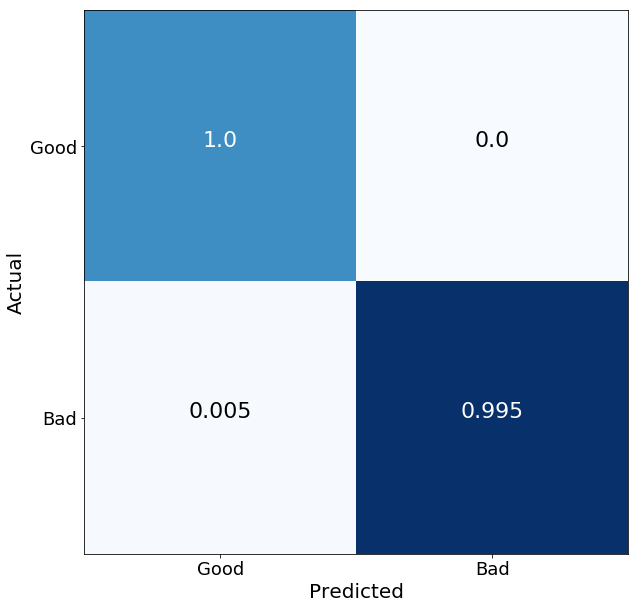

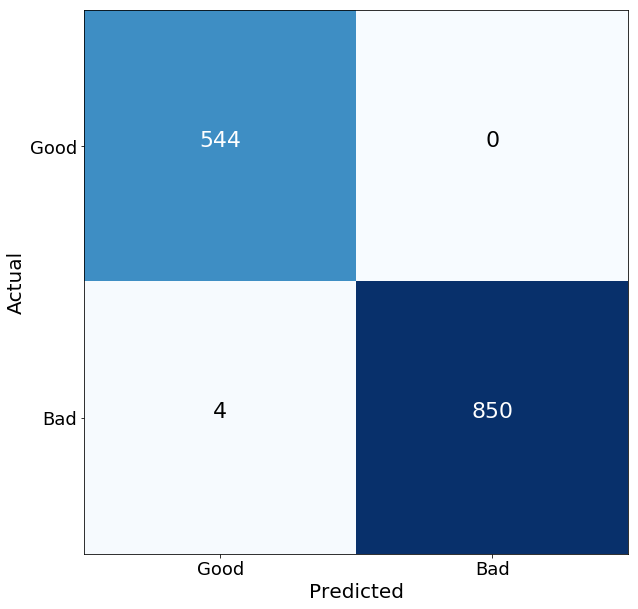

In [6]:
GB_00p_AB_model = SSM_Model(GB_test_X, GB_test_Y, n_ch = 2, n_cls = 2, class_name = class_name, 
                            model_dir = model_dir, model_name = 'GB_00p_AB', batch_size = 200, GPU_idx = 3)

GB_00p_AB_model.Evaluation()
GB_00p_AB_model.ConfusionMatrix(CM_save_dir, x_angle = 0)

Model: GB_00p_A_2004250655_03580_accr_1.0000_loss_0.000239_val_accr_0.9800_val_loss_0.171506.pt 

Accuracy: 98.14 % (1372 / 1398)



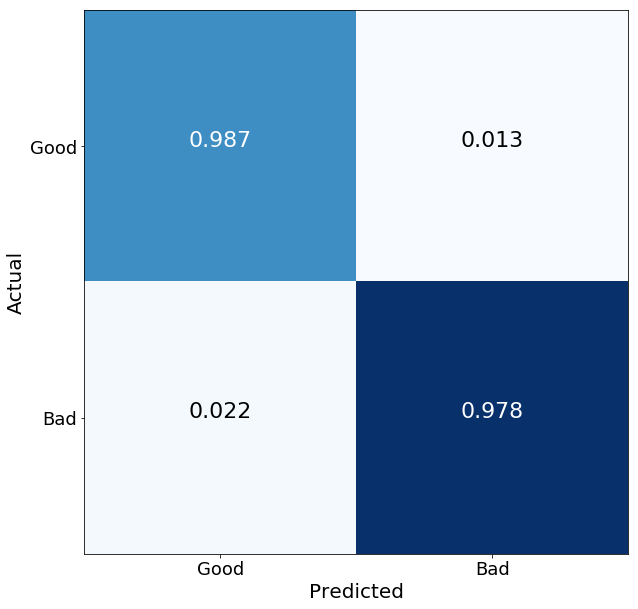

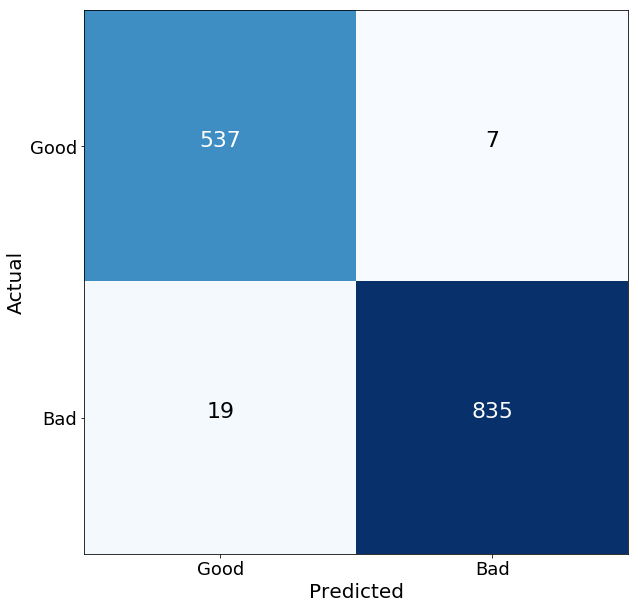

In [7]:
GB_00p_A_model = SSM_Model(np.expand_dims(GB_test_X[:,0,:,:], axis = 1), GB_test_Y, n_ch = 1, n_cls = 2, 
                           class_name = class_name, model_dir = model_dir, model_name = 'GB_00p_A', batch_size = 200, GPU_idx = 3)

GB_00p_A_model.Evaluation()
GB_00p_A_model.ConfusionMatrix(CM_save_dir, x_angle = 0)

Model: GB_00p_B_2004250210_04390_accr_1.0000_loss_0.000041_val_accr_0.9920_val_loss_0.057217.pt 

Accuracy: 99.57 % (1392 / 1398)



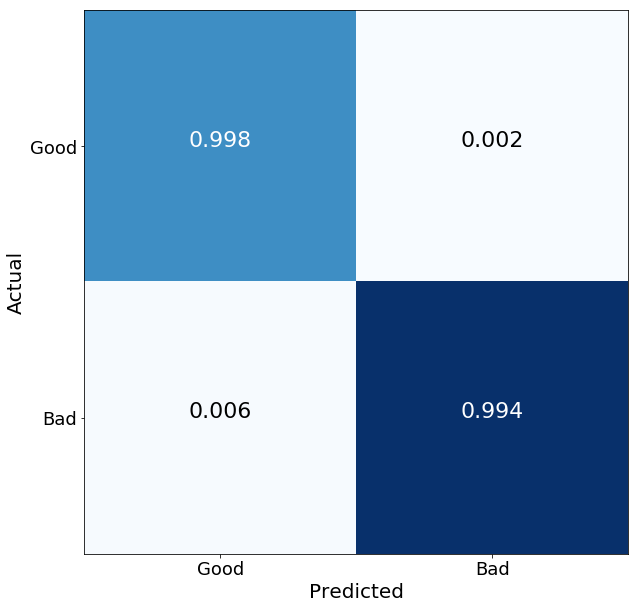

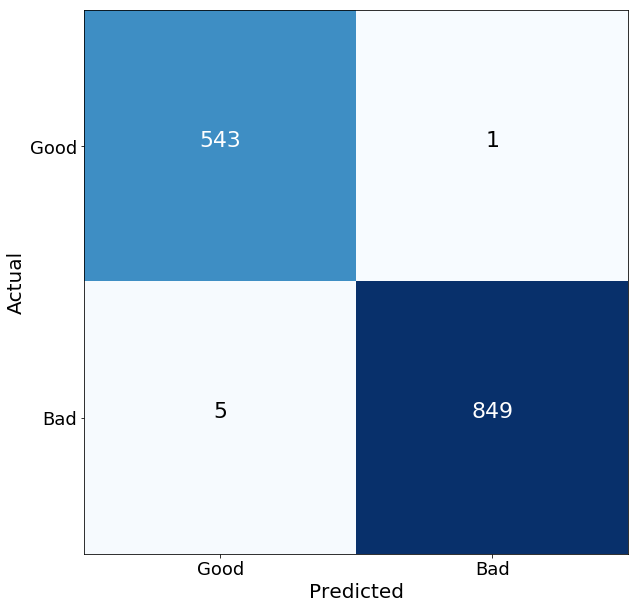

In [8]:
GB_00p_B_model = SSM_Model(np.expand_dims(GB_test_X[:,1,:,:], axis = 1), GB_test_Y, n_ch = 1, n_cls = 2, 
                           class_name = class_name, model_dir = model_dir, model_name = 'GB_00p_B', batch_size = 20, GPU_idx = 3)

GB_00p_B_model.Evaluation()
GB_00p_B_model.ConfusionMatrix(CM_save_dir, x_angle = 0)

In [9]:
df = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1 score'])

CMs = [GB_00p_A_model.cm, GB_00p_B_model.cm, GB_00p_AB_model.cm]
model_names = [GB_00p_A_model.model_name, GB_00p_B_model.model_name, GB_00p_AB_model.model_name]

for cm, model_name in zip(CMs, model_names):
    accr = round((cm[0, 0] + cm[1, 1]) / np.sum(cm), 4)
    precision = round(cm[1, 1] / (cm[0, 1] + cm[1, 1]), 4)
    recall = round(cm[1, 1] / (cm[1, 0] + cm[1, 1]), 4)
    f1_score = round(2*precision*recall/(precision + recall), 4)
    df.loc[model_name] = [accr, precision, recall, f1_score]

df.to_csv('./results/GB_00p_cls_performance_for_10p_data.csv',encoding='utf-8-sig', index = True)    
    
df

,Accuracy,Precision,Recall,F1 score
GB_00p_A,0.9814,0.9917,0.9778,0.9847
GB_00p_B,0.9957,0.9988,0.9941,0.9964
GB_00p_AB,0.9971,1.0000,0.9953,0.9976


# 2. Fault classification

In [10]:
class_name = ['Heavy Oil', 'Die Punch', 'Scrapped Wire', 'Die Chip', 'Die Internal', 'PIN']

Model: B6_00p_AB_2005010621_09960_accr_1.0000_loss_0.000007_val_accr_0.9479_val_loss_0.429951.pt 

Accuracy: 94.26 % (805 / 854)



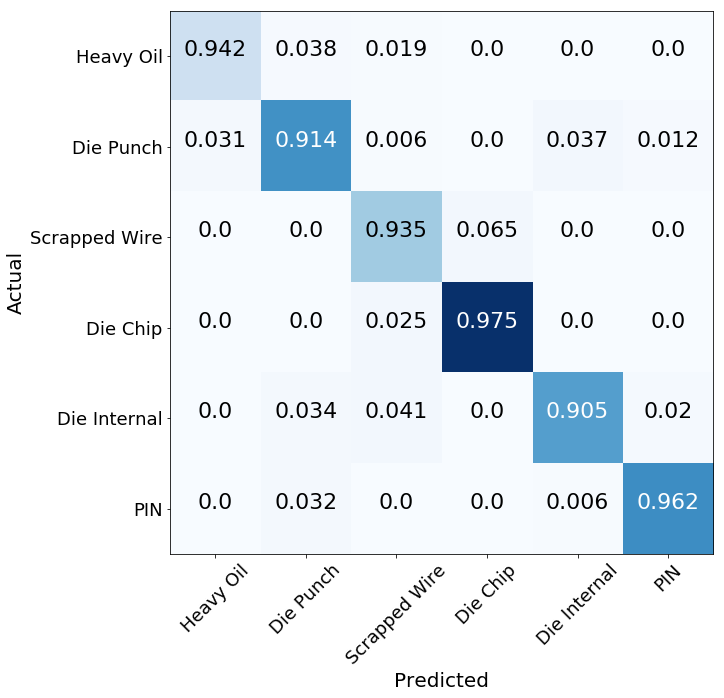

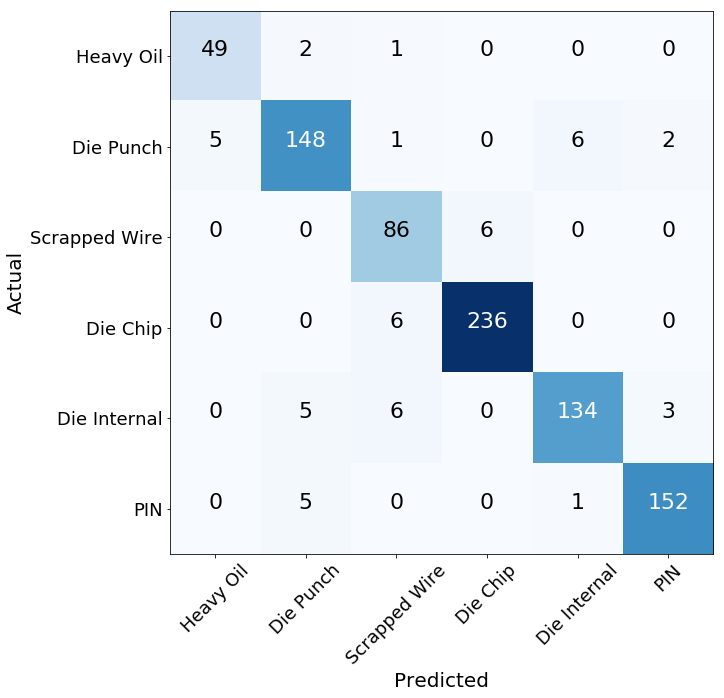

In [11]:
B6_00p_AB_model = SSM_Model(B6_test_X, B6_test_Y, n_ch = 2, n_cls = 6, class_name = class_name, 
                            model_dir = model_dir, model_name = 'B6_00p_AB', batch_size = 20, GPU_idx = 3)

B6_00p_AB_model.Evaluation()
B6_00p_AB_model.ConfusionMatrix(CM_save_dir, x_angle = 45)

Model: B6_00p_A_2005010629_13780_accr_0.9989_loss_0.003237_val_accr_0.8893_val_loss_1.376374.pt 

Accuracy: 89.81 % (767 / 854)



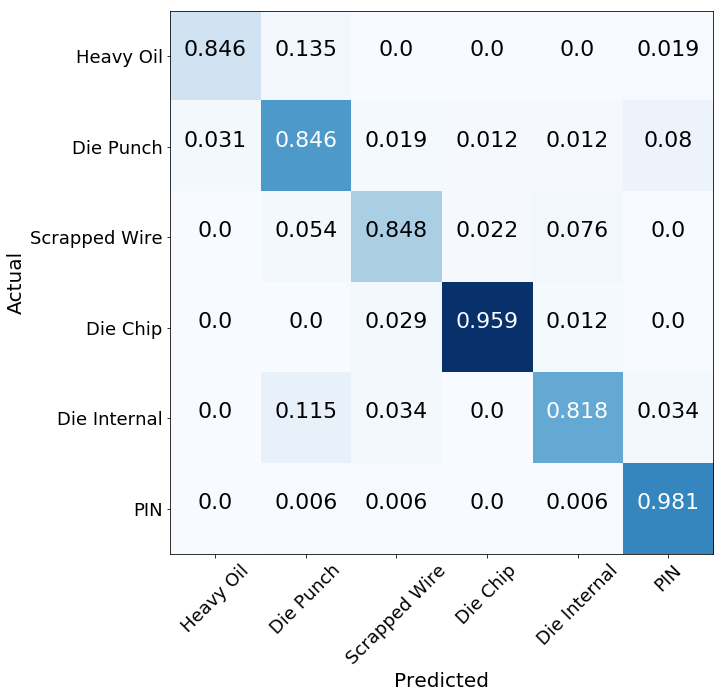

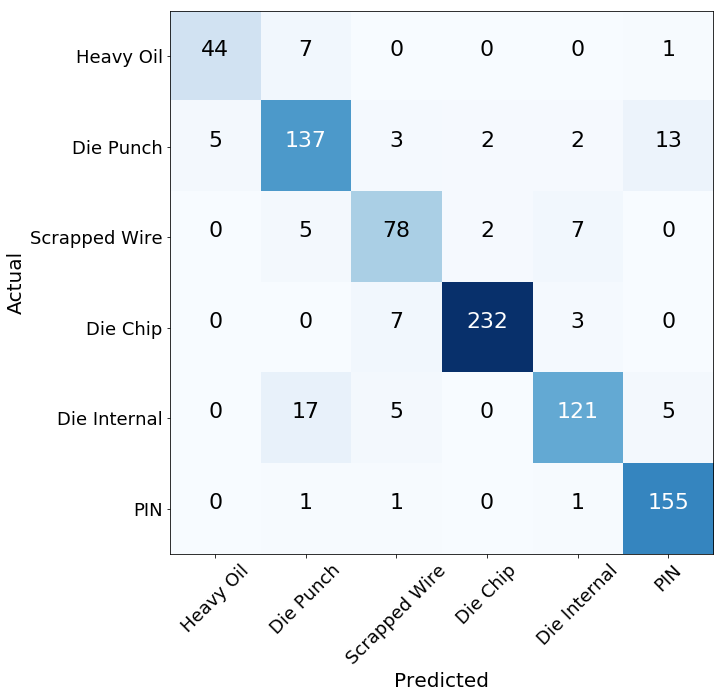

In [12]:
B6_00p_A_model = SSM_Model(np.expand_dims(B6_test_X[:,0,:,:], axis = 1), B6_test_Y, n_ch = 1, n_cls = 6, 
                           class_name = class_name, model_dir = model_dir, model_name = 'B6_00p_A', batch_size = 20, GPU_idx = 3)

B6_00p_A_model.Evaluation()
B6_00p_A_model.ConfusionMatrix(CM_save_dir, x_angle = 45)

Model: B6_00p_B_2005010439_06510_accr_1.0000_loss_0.000455_val_accr_0.9316_val_loss_0.533475.pt 

Accuracy: 92.62 % (791 / 854)



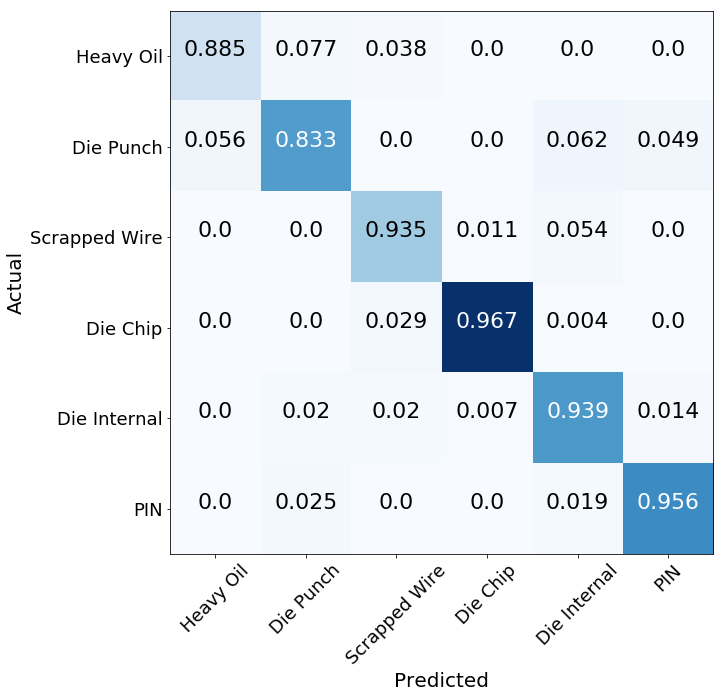

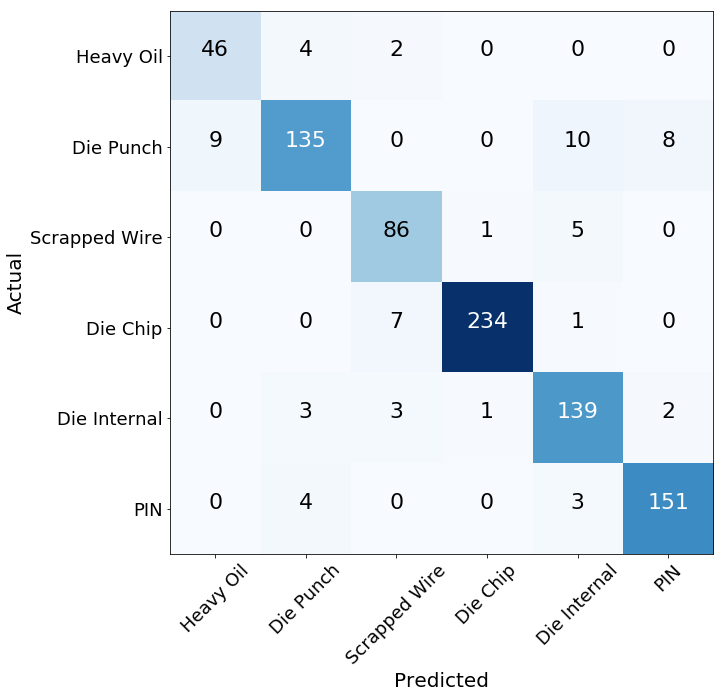

In [13]:
B6_00p_B_model = SSM_Model(np.expand_dims(B6_test_X[:,1,:,:], axis = 1), B6_test_Y, n_ch = 1, n_cls = 6, 
                           class_name = class_name, model_dir = model_dir, model_name = 'B6_00p_B', batch_size = 20, GPU_idx = 3)

B6_00p_B_model.Evaluation()
B6_00p_B_model.ConfusionMatrix(CM_save_dir, x_angle = 45)

In [14]:
df = pd.DataFrame(columns = ['Accuracy'])

CMs = [B6_00p_A_model.cm, B6_00p_B_model.cm, B6_00p_AB_model.cm]
model_names = [B6_00p_A_model.model_name, B6_00p_B_model.model_name, B6_00p_AB_model.model_name]

for cm, model_name in zip(CMs, model_names):
    accr = round(np.trace(cm) / np.sum(cm), 4)
    df.loc[model_name] = [accr]

df.to_csv('./results/B6_00p_cls_performance_ONLY_accr_for_10p_data.csv',encoding='utf-8-sig', index = True)    
    
df

,Accuracy
B6_00p_A,0.8981
B6_00p_B,0.9262
B6_00p_AB,0.9426


In [15]:
model_names = [B6_00p_A_model.model_name, B6_00p_B_model.model_name, B6_00p_AB_model.model_name]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
tuples = [i for i in itertools.product(model_names, metrics)]
col = pd.MultiIndex.from_tuples(tuples)
df = pd.DataFrame(columns = col)

CMs = [B6_00p_A_model.cm, B6_00p_B_model.cm, B6_00p_AB_model.cm]
class_names = ['Heavy Oil', 'Die Punch', 'Scrapped Wire', 'Die Chip', 'Die Internal', 'PIN']
for c_n, cm in zip(np.arange(0, 16, 4), CMs):
    accr = round(np.trace(cm) / np.sum(cm), 4)
    for i, cls_name in zip(range(len(class_names)), class_names):
        precision = round(cm[i, i] / np.sum(cm[:, i]), 4)
        recall = round(cm[i, i] / np.sum(cm[i, :]), 4)
        f1_score = round(2*precision*recall/(precision + recall), 4)
        df.loc[cls_name, c_n:c_n+4] = [accr, precision, recall, f1_score]
        
df.to_csv('./results/B6_00p_cls_performance_for_10p_data.csv',encoding='utf-8-sig', index = True)    

df

B6_00p_A                            B6_00p_B                    \
              Accuracy Precision  Recall F1 score Accuracy Precision  Recall   
Heavy Oil       0.8981     0.898  0.8462   0.8713   0.9262    0.8364  0.8846   
Die Punch       0.8981    0.8204  0.8457   0.8329   0.9262    0.9247  0.8333   
Scrapped Wire   0.8981    0.8298  0.8478   0.8387   0.9262    0.8776  0.9348   
Die Chip        0.8981    0.9831  0.9587   0.9707   0.9262    0.9915  0.9669   
Die Internal    0.8981     0.903  0.8176   0.8582   0.9262    0.8797  0.9392   
PIN             0.8981    0.8908   0.981   0.9337   0.9262    0.9379  0.9557   

                       B6_00p_AB                             
              F1 score  Accuracy Precision  Recall F1 score  
Heavy Oil       0.8598    0.9426    0.9074  0.9423   0.9245  
Die Punch       0.8766    0.9426     0.925  0.9136   0.9193  
Scrapped Wire   0.9053    0.9426      0.86  0.9348   0.8958  
Die Chip         0.979    0.9426    0.9752  0.9752   0.9752  
Die Internal    0.9085    0.9426    0.9504  0.9054   0.9274  
PIN             0.9467    0.9426    0.9682   0.962   0.9651